In [14]:
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import numpy as np
from common import Fonts, Images, Colors, add_signature

In [15]:
year = "2024"

In [19]:
df_cum = pd.read_csv("data/golden_boot_" + year + ".csv", index_col=0)
df_cum = df_cum.iloc[0:7]
df_cum.columns = pd.to_datetime(df_cum.columns)
df_cum

,2024-03-15,2024-03-16,2024-03-17,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22,2024-03-23,2024-03-24,...,2024-10-25,2024-10-26,2024-10-27,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,2024-11-03
player,,,,,,,,,,,,,,,,,,,,,
Temwa Chawinga,0,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20
Barbra Banda,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
Sophia Smith,0,2,2,2,2,2,2,2,2,2,...,11,11,11,11,11,11,11,12,12,12
Marta,0,0,0,0,0,0,0,1,1,1,...,8,8,8,8,8,8,8,8,9,9
Esther González,0,0,0,0,0,0,0,0,0,1,...,7,7,7,7,7,7,7,9,9,9
Bethany Balcer,0,0,1,1,1,1,1,1,1,1,...,7,7,7,7,7,7,7,7,7,8
Ouleymata Sarr,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8


<Figure size 1440x1440 with 0 Axes>

<Figure size 8000x8000 with 0 Axes>

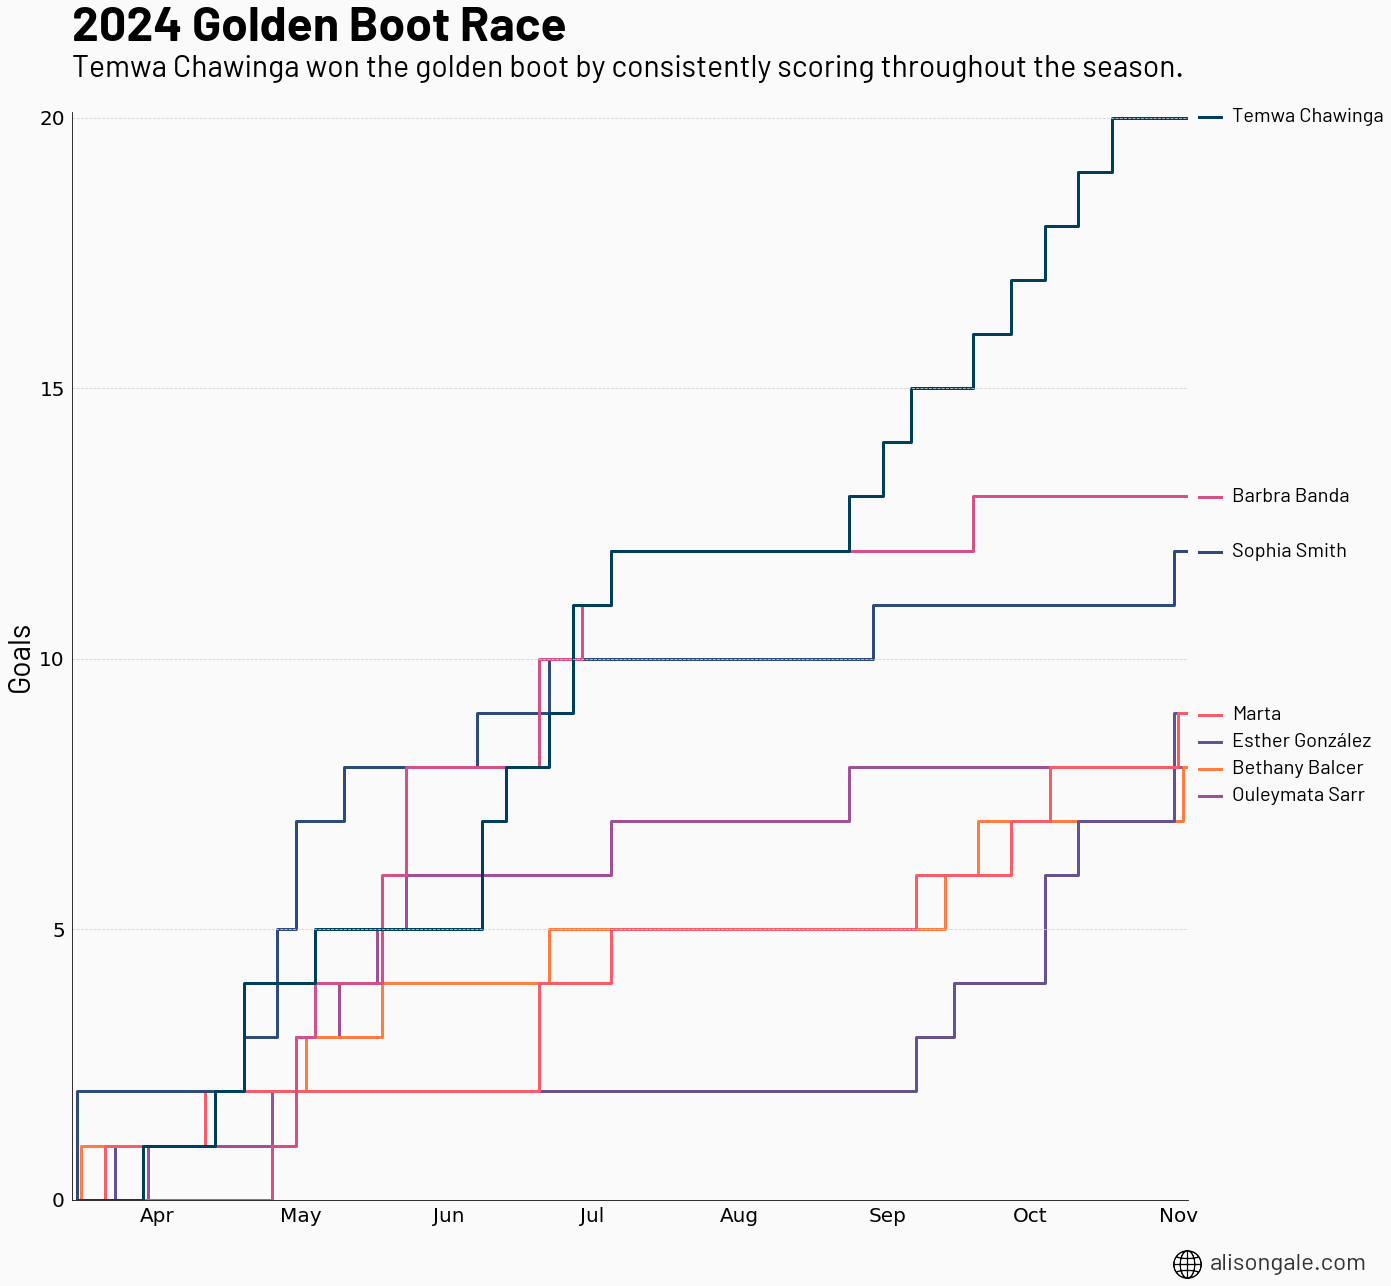

In [35]:
# General
plt.clf()
plt.rcParams["figure.figsize"] = (20, 20)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Colors
n_colors = 8
colors = [
    "#003f5c",
    "#d45087",
    "#2f4b7c",
    "#f95d6a",
    "#665191",
    "#ff7c43",
    "#a05195",
    "#ffa600",
]

# Plot data
count = {}
for i, (name, row) in enumerate(df_cum.iterrows()):
    ax.step(
        df_cum.columns,
        row,
        label=i,
        linewidth=3,
        color=colors[i % n_colors],
        zorder=-1 * i,
    )

    offset = 0
    goals = row[-1]
    if goals in count:
        offset = count[goals]
        count[goals] = offset + 1
    else:
        count[goals] = 1

    y = row[-1] / df_cum.max().max() - offset * 0.025 - 0.004

    ax.text(
        1.04,
        y,
        name,
        transform=ax.transAxes,
        color="black",
        fontsize=20,
        fontproperties=Fonts.BARLOW,
        fontweight="bold",
        va="center",
        ha="left",
    )

    plt.plot(
        [1.01, 1.03],
        [y, y],
        transform=ax.transAxes,
        linewidth=3,
        color=colors[i % n_colors],
        clip_on=False,
    )

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=20)
plt.tick_params(left = False, bottom=False) 

ax.set_ylim(0, df_cum.max().max() + 0.1)
plt.locator_params(axis="y", nbins=5)
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY, linestyle="--")
plt.ylabel("Goals", fontproperties=Fonts.BARLOW, size=30)

ax.set_xlim([df_cum.columns[0] - timedelta(days=1), df_cum.columns[-1]])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Title
plt.title(
    year + " Golden Boot Race",
    fontproperties=Fonts.BARLOW_BOLD,
    size=48,
    ha="left",
    x=0,
    y=1.06,
)
plt.suptitle(
    "Temwa Chawinga won the golden boot by consistently scoring throughout the season.",
    fontproperties=Fonts.BARLOW,
    size=30,
    ha="left",
    x=0.125,
    y=0.92,
)

# Add signature
add_signature(fig, x=0.89, y=0.07, fs=24, w=0.02)

# Save image
plt.savefig("images/golden_boot_" + year + ".png", bbox_inches="tight", pad_inches=0.5)